## o	Using tensorflow and python implement CNN for MNIST, Fashion_Mnist,ASL (American Sign Language)

### 1] MNIST

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()#split dataset into train and test
X_train.shape,X_test.shape,y_train.shape,y_test.shape 
#check the shape of train and test dataset which is 
#60000:number of samples in the set
#28:height of each image.
#28:width of each image.

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### DATA SCALING
<p>Data scaling is used to reduce computation time as the neural network works easier with the values that don't vary a lot in scale like range in 0 to 1 or -1 to 1 in every input/features

In [3]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [4]:
#scaled_value = (original_value – min) / (max – min)
X_train = (X_train - 0) / (255 - 0)
X_test = (X_test - 0) / (255 - 0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

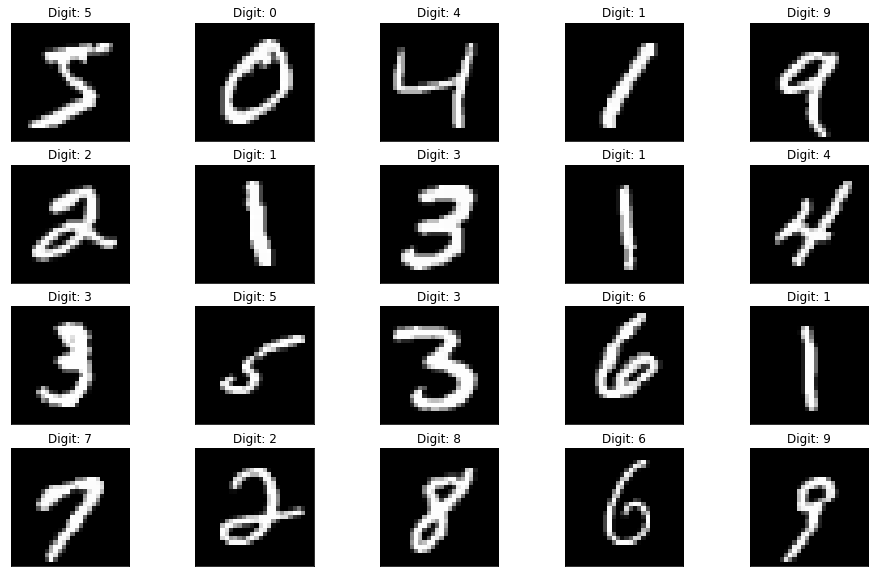

In [5]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])


plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
    
plt.show()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
#reshape() function to reshape all of the data by adding that extra dimension.
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))
X_train.shape

(60000, 28, 28, 1)

***This is important because it determines which loss function we should use to optimize our neural network.
We have two options:***

<li>Use <b>integers</b> for our target values (as they are now), and make sure we use the <b>"Sparse Categorical Cross-Entropy"</b> loss function.</li>
<li><b>One-hot encode(float dtype)</b> the targets and use the <b>"Categorical Cross-Entropy"</b> loss function.

In [8]:
#let's take a look at the format of our target values (y_train)
y_train[0:20]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

### Define Model

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

### Compile 

In [10]:
model.compile(
    optimizer='sgd', 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

### Fit the model

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks=[EarlyStopping(monitor='val_accuracy',patience=3)]
history=model.fit(X_train, y_train,epochs=20,batch_size=32,validation_split=0.2,callbacks=callbacks)

Epoch 1/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5229 - accuracy: 0.8588 - val_loss: 0.2615 - val_accuracy: 0.9240
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2497 - accuracy: 0.9261 - val_loss: 0.1992 - val_accuracy: 0.9427
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1896 - accuracy: 0.9431 - val_loss: 0.1752 - val_accuracy: 0.9499
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1541 - accuracy: 0.9542 - val_loss: 0.1376 - val_accuracy: 0.9602
Epoch 5/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1306 - accuracy: 0.9604 - val_loss: 0.1319 - val_accuracy: 0.9614
Epoch 6/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1143 - accuracy: 0.9658 - val_loss: 0.1187 - val_accuracy: 0.9663
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1017 - accuracy: 0.9693 - val_loss: 0.1088 - val_ac

### Evaluation

In [12]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 1s 3ms/step


0.9819

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
confusion =confusion_matrix(y_test, predictions)
confusion


array([[ 965,    0,    1,    1,    2,    3,    4,    2,    2,    0],
       [   0, 1126,    1,    1,    0,    2,    3,    0,    2,    0],
       [   3,    4, 1012,    1,    1,    0,    1,    5,    5,    0],
       [   0,    1,    4,  985,    0,   12,    0,    3,    5,    0],
       [   0,    1,    3,    0,  970,    0,    2,    0,    1,    5],
       [   1,    0,    0,    1,    0,  885,    3,    0,    1,    1],
       [   4,    3,    0,    1,    2,    4,  943,    0,    1,    0],
       [   0,    4,    9,    1,    0,    0,    0, 1011,    2,    1],
       [   1,    1,    3,    7,    2,    3,    2,    2,  951,    2],
       [   4,    6,    1,    4,    8,    7,    1,    7,    0,  971]],
      dtype=int64)

<AxesSubplot:>

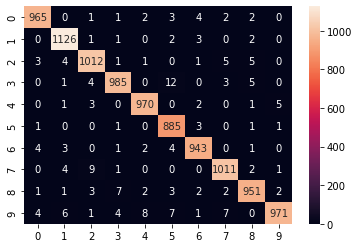

In [14]:
import seaborn as sns
sns.heatmap(confusion, annot=True, fmt='d')

In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 1.0, 'Accuracy Evaluation')

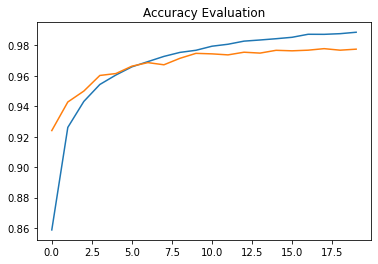

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Evaluation')

Text(0.5, 1.0, 'loss Evaluation')

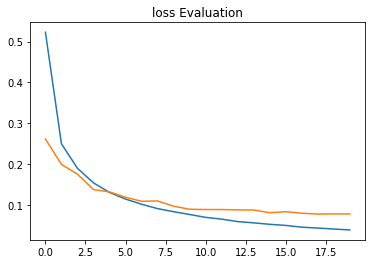

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss Evaluation')

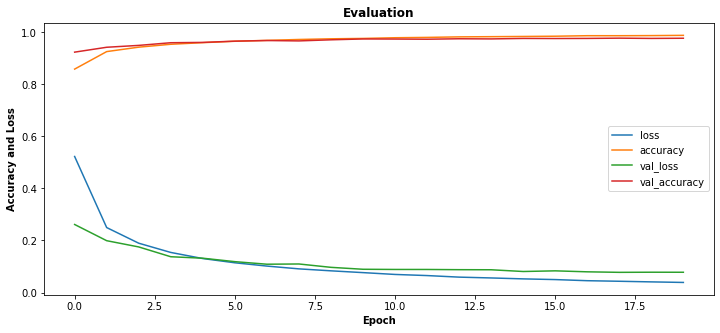

In [18]:
pd.DataFrame(history.history).plot(figsize=(12,5))
plt.title('Evaluation',fontweight='bold')
plt.xlabel('Epoch',fontweight='bold')
plt.ylabel('Accuracy and Loss',fontweight='bold')
plt.show()

### 2] Fashion_Mnist

In [19]:

(X_train, y_train), (X_test, y_test) =tf.keras.datasets.fashion_mnist.load_data() #split dataset into train and test
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### DATA SCALING

In [20]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [21]:
#scaled_value = (original_value – min) / (max – min)
X_train = (X_train - 0) / (255 - 0)
X_test = (X_test - 0) / (255 - 0)
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

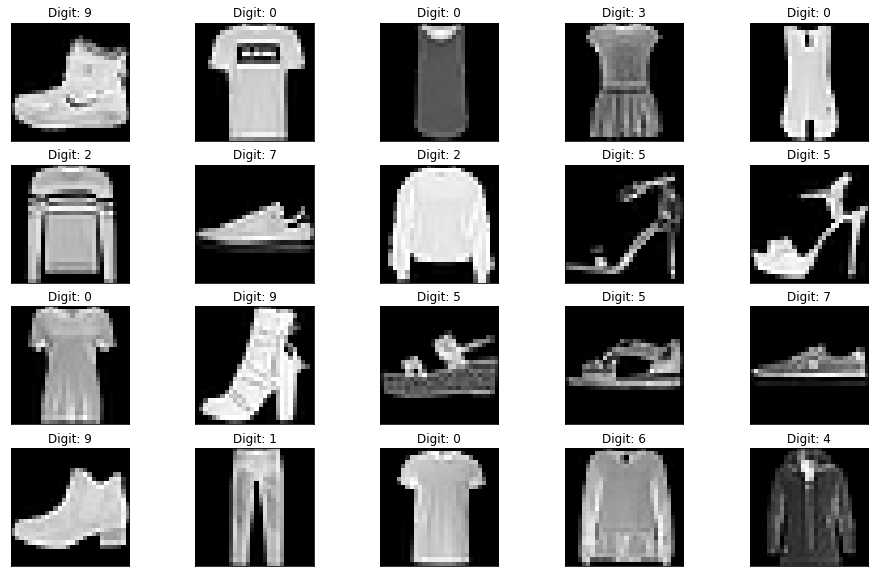

In [22]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])


plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
    
plt.show()

***There are ten categories to classify in the fashion_mnist dataset:***<br>
**1**--T-shirt/top 
**2**--Pullover
**3**--Dress
**4**--Coat
**5**--Sandal
**6**--Shirt
**7**--Sneaker
**8**--Bag
**9**--Ankle boot

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
#reshape() function to reshape all of the data by adding that extra dimension.
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))
X_train.shape

(60000, 28, 28, 1)

In [25]:
#let's take a look at the format of our target values (y_train)
y_train[0:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

### Define Model2

In [26]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

### Compile 

In [27]:
model2.compile(
    optimizer='sgd', 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

### Fit the model

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks2=[EarlyStopping(monitor='val_accuracy',patience=3)]
history2=model2.fit(X_train, y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=callbacks2)

Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.7347 - accuracy: 0.7475 - val_loss: 0.5151 - val_accuracy: 0.8227
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4985 - accuracy: 0.8222 - val_loss: 0.4679 - val_accuracy: 0.8364
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4462 - accuracy: 0.8426 - val_loss: 0.4448 - val_accuracy: 0.8442
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4107 - accuracy: 0.8551 - val_loss: 0.4315 - val_accuracy: 0.8468
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3836 - accuracy: 0.8648 - val_loss: 0.3910 - val_accuracy: 0.8606
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3621 - accuracy: 0.8716 - val_loss: 0.3809 - val_accuracy: 0.8643
Epoch 7/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3441 - accuracy: 0.8772 - val_loss: 0.3564 - val_ac

### Evaluation

In [29]:
predictions2 = np.argmax(model2.predict(X_test), axis=-1)
accuracy_score(y_test, predictions2)

313/313 [==============================] - 1s 2ms/step


0.8751

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, predictions2)
confusion_matrix

array([[743,   1,  36,  57,   5,   3, 142,   0,  13,   0],
       [  0, 970,   0,  22,   3,   0,   4,   0,   1,   0],
       [  7,   1, 866,  15,  54,   1,  54,   0,   2,   0],
       [  7,  12,  16, 908,  28,   0,  25,   0,   4,   0],
       [  0,   1, 131,  31, 771,   1,  63,   0,   2,   0],
       [  0,   0,   0,   2,   0, 973,   0,  15,   1,   9],
       [ 86,   0, 105,  42,  72,   0, 679,   0,  16,   0],
       [  0,   0,   0,   0,   0,  42,   0, 922,   0,  36],
       [  1,   1,  11,   5,   4,   5,   2,   5, 966,   0],
       [  0,   0,   0,   0,   0,  10,   1,  36,   0, 953]], dtype=int64)

<AxesSubplot:>

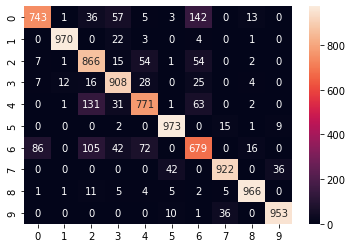

In [31]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [32]:
print(classification_report(y_test, predictions2))


              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1000
           1       0.98      0.97      0.98      1000
           2       0.74      0.87      0.80      1000
           3       0.84      0.91      0.87      1000
           4       0.82      0.77      0.80      1000
           5       0.94      0.97      0.96      1000
           6       0.70      0.68      0.69      1000
           7       0.94      0.92      0.93      1000
           8       0.96      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



Text(0.5, 1.0, 'Accuracy Evaluation')

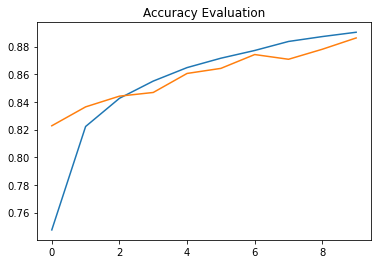

In [33]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy Evaluation')

Text(0.5, 1.0, 'loss Evaluation')

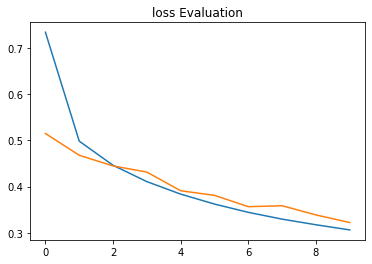

In [34]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('loss Evaluation')

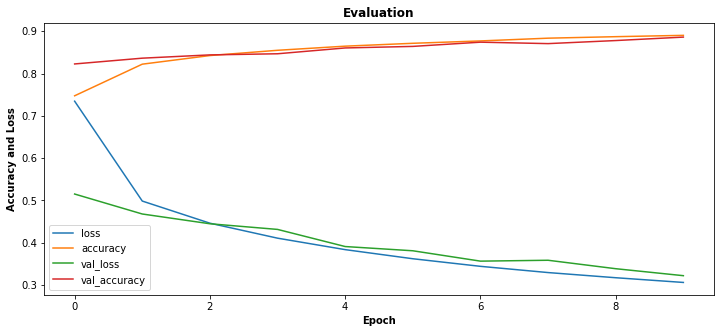

In [35]:
pd.DataFrame(history2.history).plot(figsize=(12,5))
plt.title('Evaluation',fontweight='bold')
plt.xlabel('Epoch',fontweight='bold')
plt.ylabel('Accuracy and Loss',fontweight='bold')
plt.show()

### 3] ASL (American Sign Language)


In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
# get our training and testing dataset
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [237]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [238]:
# get training the labels
labels = train['label'].values

In [239]:
# view the unique labels, 24 in target
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

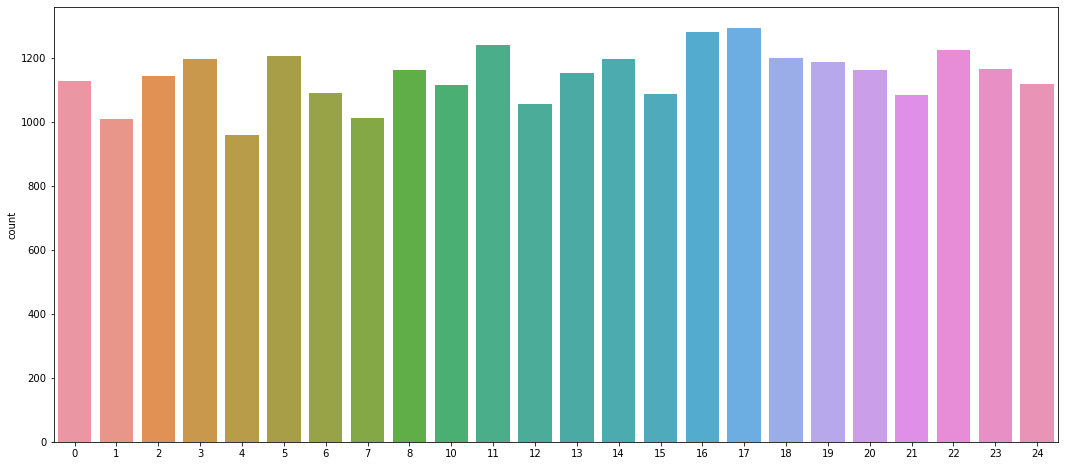

In [240]:
# plot the quantites in each class
plt.figure(figsize = (18,8))
sns.countplot(x=labels)

In [241]:
# drop the training labels from our training data so we can seaperate it
train.drop('label',axis = 1, inplace=True)

In [242]:
# extract the image data from each row in our csv, remeber its is a row784 column
image = train.values
image = np.array([np.reshape(i,(28,28)) for i in image])
image = np.array([i.flatten() for i in image])

In [243]:
# labelencoder
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [244]:
# view our label
labels
#len(labels[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


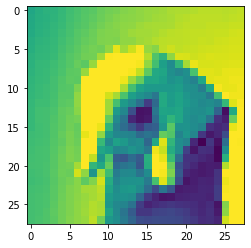

In [245]:
# inspect the image
index=5
print(labels[index])
plt.imshow(image[index].reshape(28,28))

In [246]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image, labels, test_size = 0.3, random_state=101)

In [247]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
batch_size=128
num_classes=24
epochs=10


In [248]:
#scale images
x_train = x_train/255
x_test = x_test/255

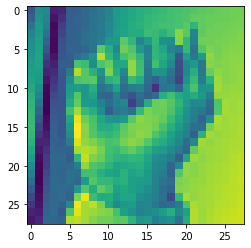

In [249]:
#reshape them into ize required by TF and Keras
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
plt.imshow(x_train[0].reshape(28,28))

In [250]:
# define the model
from tensorflow.keras import backend as k
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation='softmax'))


In [251]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 1, 1, 64)       

In [252]:
# compile model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [253]:
# train the model
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
121/121 [==============================] - 7s 56ms/step - loss: 2.5615 - accuracy: 0.2150 - val_loss: 1.6025 - val_accuracy: 0.4862
Epoch 2/10
121/121 [==============================] - 7s 55ms/step - loss: 1.1956 - accuracy: 0.6056 - val_loss: 0.8231 - val_accuracy: 0.7349
Epoch 3/10
121/121 [==============================] - 7s 55ms/step - loss: 0.6832 - accuracy: 0.7699 - val_loss: 0.5386 - val_accuracy: 0.8028
Epoch 4/10
121/121 [==============================] - 7s 55ms/step - loss: 0.4323 - accuracy: 0.8559 - val_loss: 0.3359 - val_accuracy: 0.8868
Epoch 5/10
121/121 [==============================] - 7s 55ms/step - loss: 0.2660 - accuracy: 0.9163 - val_loss: 0.1892 - val_accuracy: 0.9441
Epoch 6/10
121/121 [==============================] - 7s 55ms/step - loss: 0.1736 - accuracy: 0.9476 - val_loss: 0.1455 - val_accuracy: 0.9623
Epoch 7/10
121/121 [==============================] - 7s 55ms/step - loss: 0.1343 - accuracy: 0.9597 - val_loss: 0.0898 - val_accuracy: 0.9742

In [259]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [260]:
print(f'accuracy: {accuracy*100}')

accuracy: 99.24730062484741


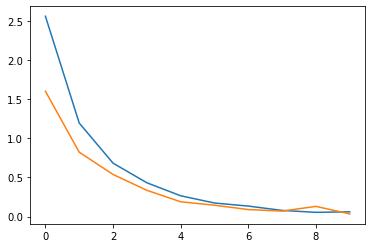

In [261]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

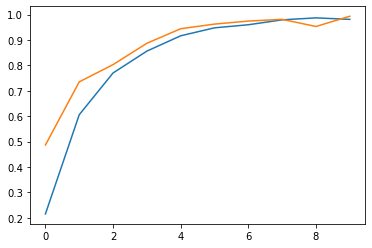

In [262]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [263]:
y_pred = model.predict(x_test)

258/258 [==============================] - 1s 4ms/step
